# Heart Disease Classification - Toby Liang

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data and Data Summary

In [4]:
dataset = pd.read_csv("./data/heart_disease.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Fields Explained
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [4]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data contains 303 examples with 13 features and 1 binary label

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.target.unique()

array([1, 0])

## Data Visualization

### Target

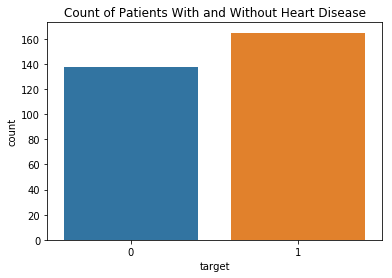

In [7]:
plt.title("Count of Patients With and Without Heart Disease")
sns.countplot(dataset.target)
plt.show()

In [8]:
dataset.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

*Slightly more subjects (54.46%) have heart disease than not.*

### Sex

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


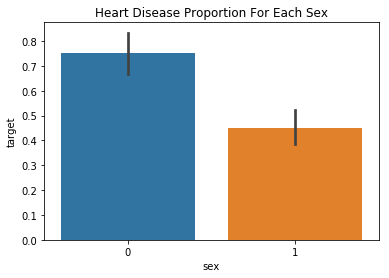

In [9]:
plt.title("Heart Disease Proportion For Each Sex")
sns.barplot(dataset.sex, dataset.target)
plt.show()

*Heart disease occurs significanly more frequently in female subjects than male subjects.*

### Chest Pain

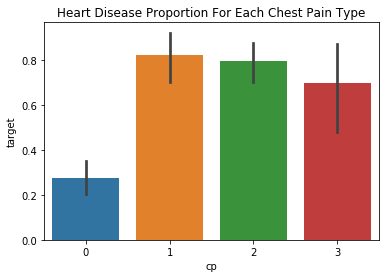

In [10]:
plt.title("Heart Disease Proportion For Each Chest Pain Type")
sns.barplot(dataset.cp, dataset.target)
plt.show()

*Heart disease occurs significantly less in patients with typical angina while proportions for patients with other chest pains are quite high (70%-80%).*

### Fasting Blood Sugar

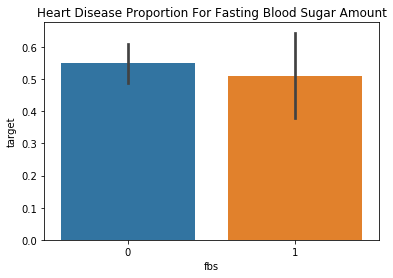

In [11]:
plt.title("Heart Disease Proportion For Fasting Blood Sugar Amount")
sns.barplot(dataset.fbs, dataset.target)
plt.show()

*Subjects with resting blood sugar of less than 120 mg/dl are slightly more likely to have heart disease.*

### Resting ECG

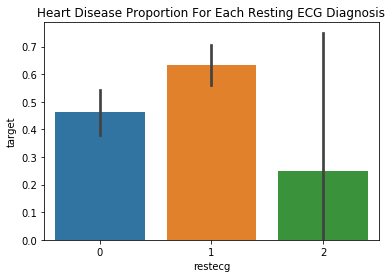

In [12]:
plt.title("Heart Disease Proportion For Each Resting ECG Diagnosis")
sns.barplot(dataset.restecg, dataset.target)
plt.show()

*Subjects with ST-T wave abnormality are more likely to have heart disease.*

### Exercise Induced Angina

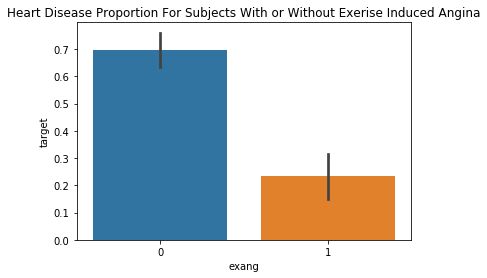

In [13]:
plt.title("Heart Disease Proportion For Subjects With or Without Exerise Induced Angina")
sns.barplot(dataset.exang, dataset.target)
plt.show()

*Subjects without exercise induced angina are significanly more likely to have heart disease.*

### Slope of the Peak Exercise ST Segment

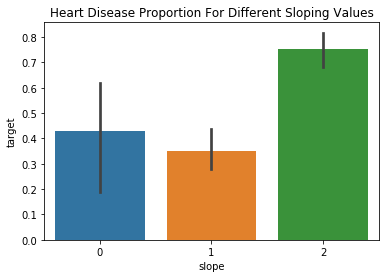

In [14]:
plt.title("Heart Disease Proportion For Different Sloping Values")
sns.barplot(dataset.slope, dataset.target)
plt.show()

*Subjects with a flat slope have a significantly higher change of heart disease.*

### Number of Major Blood Vessels

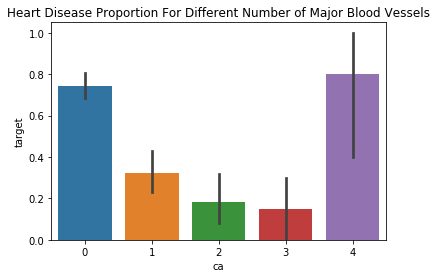

In [15]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.ca, dataset.target)
plt.show()

### Thalassemia

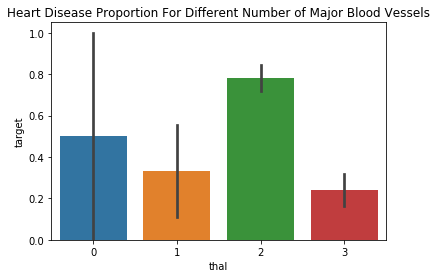

In [16]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.thal, dataset.target)
plt.show()

## Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("./data/heart_disease.csv")
features = dataset.drop("target", axis = 1)
label = dataset.target

x_train, x_test, y_train, y_test = train_test_split(features, label, train_size = 0.8)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
x_train.shape

(242, 13)

In [7]:
len(y_train)

242

In [8]:
x_test.shape

(61, 13)

In [9]:
len(y_test)

61

## Model Definition

In [3]:
# Keras modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

# Hyperparameter tuning modules
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [4]:
def build_model(lr=0.001, decay=1e-6):
    model = Sequential()
    model.add(Dense(64, kernel_initializer="random_uniform", activation="relu", input_dim=x_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer="random_uniform", activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer="random_uniform", activation="sigmoid"))
    
    opt = Adam(lr=lr, decay=decay)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    return model

## Model Tuning

In [5]:
# Keras Classifier for model tuning
model = KerasClassifier(build_fn=build_model, verbose=0, epochs=150)

# Grid search tuning
def tune_by_grid(model, param_grid, cv=5):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1, cv=cv)
    grid_result = grid.fit(x_train, y_train)
    print("Tuning finished.")

    return grid_result

# Grid analysis
def get_grid_analysis(grid_result):
    # Print best result
    print("Best: " + str(round(grid_result.best_score_, 3)) + " using " + str(grid_result.best_params_))
    
    # Get means, stds, and params
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    # Print means, stds, and params
    for mean, stdev, param in zip(means, stds, params):
        print(str(round(mean, 3)) + " with: " + str(param) + " stdev: " + str(round(stdev, 3)) + "")

### Learning Rate Optimization

In [6]:
lr_grid = dict(lr = [0.001, 0.00075, 0.0005])
grid_result = tune_by_grid(model, lr_grid)
get_grid_analysis(grid_result)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Use tf.cast instead.


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   34.1s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning finished.
Best: 0.76 using {'lr': 0.0005}
0.752 with: {'lr': 0.001} stdev: 0.055
0.756 with: {'lr': 0.00075} stdev: 0.04
0.76 with: {'lr': 0.0005} stdev: 0.035


### Epoch Optimization

In [ ]:
epoch_grid = dict(epochs = [100, 125, 150, 175])
grid_result = tune_by_grid(model, epoch_grid)
get_grid_analysis(grid_result)

## Model Fitting

In [51]:
model = build_model(lr=0.00075)
def fit_model(epochs=150):
    return model.fit(x_train.values, y_train.values, epochs=epochs, batch_size=x_train.shape[0], verbose=0)
history = fit_model()
print("Training finished.")

0.00075
Training finished.


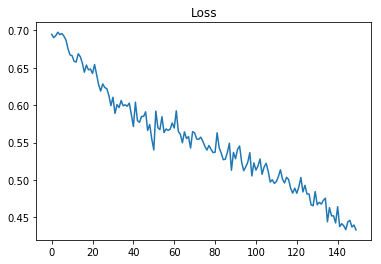

In [52]:
plt.title("Loss")
plt.plot(history.history["loss"])
plt.show()

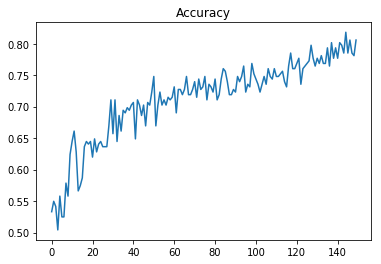

In [53]:
plt.title("Accuracy")
plt.plot(history.history["acc"])
plt.show()

In [54]:
history.history["acc"][-1]

0.8057851195335388

In [55]:
model.evaluate(x_test, y_test)

61/61 [==============================] - 1s 24ms/step


[0.4865876685400478, 0.7540983557701111]